In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\rakes\OneDrive\Desktop\course stuff\pca_on_MNIST\mnist_csv.csv")

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,target
0,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0
1,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0
2,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0
3,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0
4,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0


#### taking sample data because we are not able to compute eigen vectors of 40000 rows.

In [4]:
sample_data1 = df.sample(n = 2000)

In [5]:
sample_data=sample_data1.drop('target',axis=1)

In [6]:
sample_data

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
34385,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922
8441,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922
3823,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922
30537,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922
23755,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922
38742,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922
36001,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922
36756,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922


### 1)standaradize the data.

In [7]:
from sklearn.preprocessing import StandardScaler
stand_data=StandardScaler()
data=stand_data.fit_transform(sample_data)

In [8]:
data.shape

(2000, 784)

### 2)Find the covaiance matrix.

In [9]:
covar_mat=np.matmul(data.T,data)

In [10]:
covar_mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
covar_mat.shape

(784, 784)

### 3)Find the eigen vectors corresponding to the highest eigen values.

In [12]:
from scipy.linalg import eigh 

In [13]:
values, vectors = eigh(covar_mat, eigvals=(782,783))

In [14]:
vectors.shape

(784, 2)

In [15]:
u=vectors.T

In [16]:
u.shape

(2, 784)

### 4)So, the transformed features will be u1T.xi

In [18]:
new_coordinates=np.matmul(u,data.T)

In [83]:
print(f"""The transformed features are:
{new_coordinates}""")

The transformed features are:
[[-6.60763869 -0.974537   -7.97094473 ...  0.89567541 -2.31839149
  -4.53712904]
 [ 2.85670078  7.9636812  -8.16817024 ...  5.53347276  6.01442797
   4.40590606]]


In [34]:
a=np.vstack((new_coordinates,(sample_data1['target'].values))).T

In [35]:
a

array([[-6.60763869,  2.85670078,  8.        ],
       [-0.974537  ,  7.9636812 ,  1.        ],
       [-7.97094473, -8.16817024,  0.        ],
       ...,
       [ 0.89567541,  5.53347276,  8.        ],
       [-2.31839149,  6.01442797,  8.        ],
       [-4.53712904,  4.40590606,  9.        ]])

In [40]:
trans_data=pd.DataFrame(a,columns=['trans_f1','trans_f2','target'])

In [48]:
trans_data['target']=trans_data['target'].apply(lambda x:int(x))

In [49]:
import seaborn as sns

<AxesSubplot:xlabel='trans_f1', ylabel='trans_f2'>

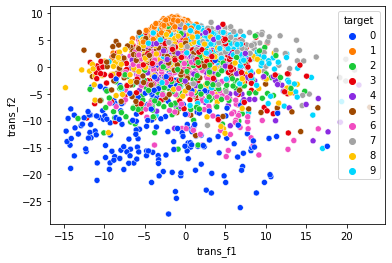

In [63]:
sns.scatterplot(x=trans_data['trans_f1'],y=trans_data['trans_f2'],hue=trans_data['target'],palette='bright')

## PCA using sklearn

In [65]:
 from sklearn.decomposition import PCA

In [68]:
pca=PCA(n_components=2)
pca_data = pca.fit_transform(sample_data)

In [71]:
pca_data = np.vstack((pca_data.T,sample_data1['target'].values)).T

In [73]:
pca_df=pd.DataFrame(pca_data,columns=['pca_1','pca_2','target'])

In [76]:
pca_df['target']=pca_df['target'].apply(lambda x:int(x))

In [78]:
pca_df.head()

,pca_1,pca_2,target
0,-0.769861,-0.700656,8
1,-3.533461,-1.376949,1
2,3.851478,-1.469695,0
3,0.268461,2.659641,7
4,2.060178,-1.105429,5


<AxesSubplot:xlabel='pca_1', ylabel='pca_2'>

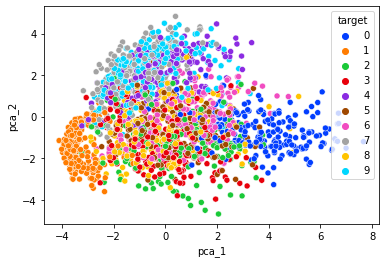

In [79]:
sns.scatterplot(x=pca_df['pca_1'],y=pca_df['pca_2'],hue=pca_df['target'],palette='bright')

<AxesSubplot:xlabel='trans_f1', ylabel='trans_f2'>

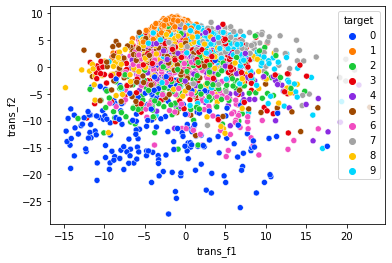

In [80]:
sns.scatterplot(x=trans_data['trans_f1'],y=trans_data['trans_f2'],hue=trans_data['target'],palette='bright')